In [2]:
import pandas as pd

# Load the dataset
data_path = '/Users/qbs/Downloads/healthcare-dataset-stroke-data 2.csv'
stroke_data = pd.read_csv(data_path)

# Show the first few rows to get an initial sense of the data
stroke_data.head()


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
# Check for missing values in each column
missing_values = stroke_data.isnull().sum()

# Check for duplicate rows
duplicate_rows = stroke_data.duplicated().sum()

# Return the counts of missing values and duplicate rows
missing_values, duplicate_rows


(id                     0
 gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 ever_married           0
 work_type              0
 Residence_type         0
 avg_glucose_level      0
 bmi                  201
 smoking_status         0
 stroke                 0
 dtype: int64,
 0)

In [4]:
# Impute missing 'bmi' values with the median
stroke_data['bmi'].fillna(stroke_data['bmi'].median(), inplace=True)

# Confirm there are no more missing values in 'bmi'
stroke_data.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Bad value in file PosixPath('/Users/qbs/.matplotlib/stylelib/my_custom_style.mplstyle'), line 15 ('axes.edgecolor: #aaaaaa'): Key axes.edgecolor: '' does not look like a color arg
Bad value in file PosixPath('/Users/qbs/.matplotlib/stylelib/my_custom_style.mplstyle'), line 16 ('axes.facecolor: #ffffff'): Key axes.facecolor: '' does not look like a color arg
Bad value in file PosixPath('/Users/qbs/.matplotlib/stylelib/my_custom_style.mplstyle'), line 17 ('axes.formatter.limits: [-5, 6]'): Key axes.formatter.limits: Could not convert '[-5' to int
Bad value in file PosixPath('/Users/qbs/.matplotlib/stylelib/my_custom_style.mplstyle'), line 114 ('figure.figsize: [6.4, 4.8]'): Key figure.figsize: Could not convert '[6.4' to float
Bad value in file PosixPath('/Users/qbs/.matplotlib/stylelib/my_custom_style.mplstyle'), line 141 ('grid.color: #cccccc'): Key grid.color: '' does not look like a color arg
Bad value in file PosixPath('/Users/qbs/.matplotlib/stylelib/my_custom_style.mplstyle'), lin

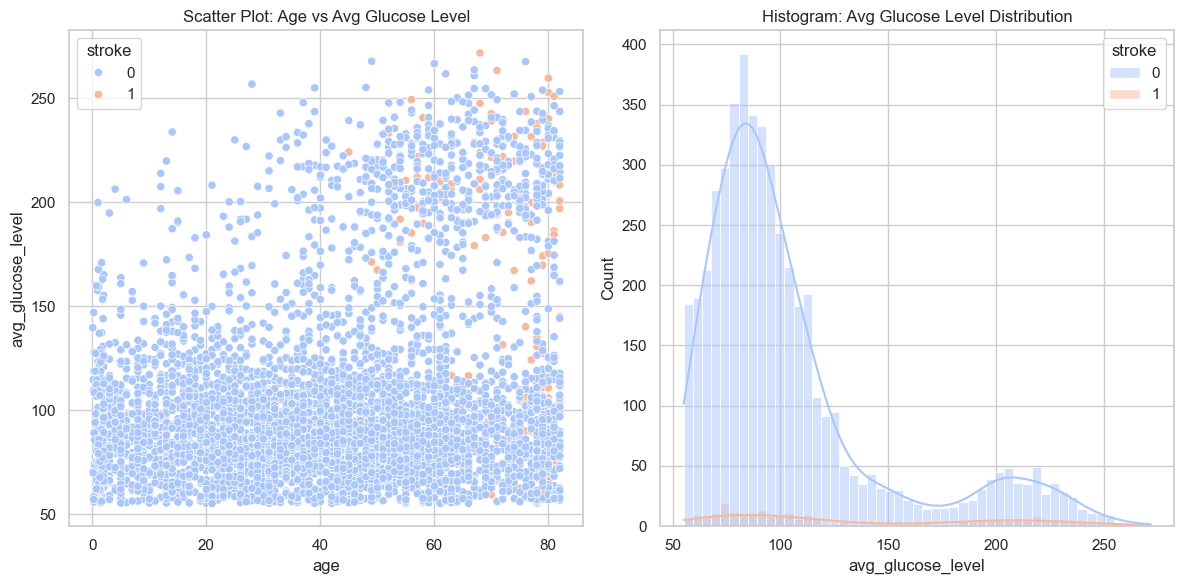

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Scatter plot with histogram
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for 'age' vs 'avg_glucose_level', colored by 'stroke'
sns.scatterplot(
    data=stroke_data, 
    x='age', 
    y='avg_glucose_level', 
    hue='stroke', 
    palette='coolwarm', 
    ax=axs[0]
).set_title('Scatter Plot: Age vs Avg Glucose Level')

# Histogram for 'avg_glucose_level'
sns.histplot(
    data=stroke_data, 
    x='avg_glucose_level', 
    hue='stroke', 
    palette='coolwarm', 
    kde=True, 
    ax=axs[1]
).set_title('Histogram: Avg Glucose Level Distribution')

# Tight layout for better visual appearance
plt.tight_layout()

# Show the plot
plt.show()  # To display the plot in this environment


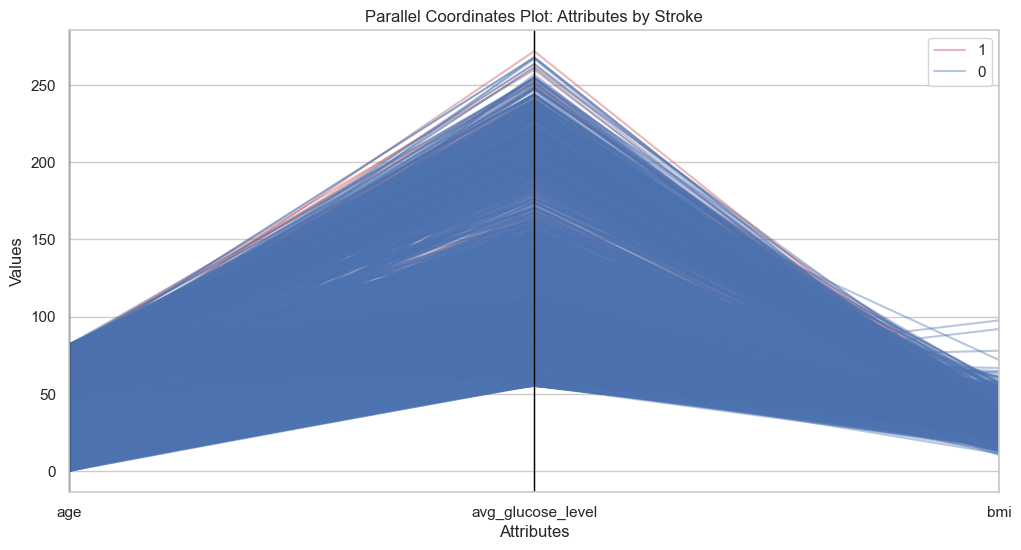

In [7]:
from pandas.plotting import parallel_coordinates

# Create a parallel coordinates plot with highlighting for 'stroke'
plt.figure(figsize=(12, 6))
parallel_coordinates(
    stroke_data, 
    class_column='stroke', 
    cols=['age', 'avg_glucose_level', 'bmi'], 
    color=['r', 'b'], 
    alpha=0.4
)
plt.title('Parallel Coordinates Plot: Attributes by Stroke')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.grid(True)
plt.show()  # To display the plot in this environment


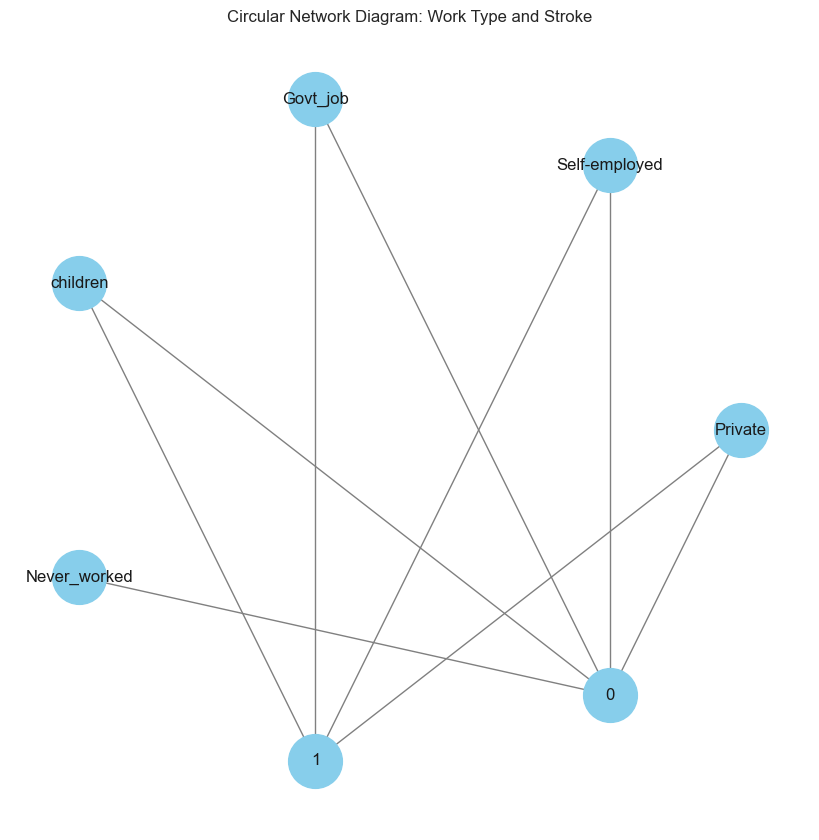

In [6]:
import networkx as nx

# Create a network graph to represent the relationship between 'work_type' and 'stroke'
G = nx.Graph()

# Add work_type and stroke as nodes
for work_type in stroke_data['work_type'].unique():
    G.add_node(work_type, label='work_type')

for stroke in stroke_data['stroke'].unique():
    G.add_node(stroke, label='stroke')

# Add edges based on the relationships between 'work_type' and 'stroke'
for _, row in stroke_data.iterrows():
    G.add_edge(row['work_type'], row['stroke'])

# Draw the network diagram with a circular layout
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=12, node_color='skyblue', edge_color='gray')
plt.title("Circular Network Diagram: Work Type and Stroke")
plt.show()  # To display the plot in this environment


In [7]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


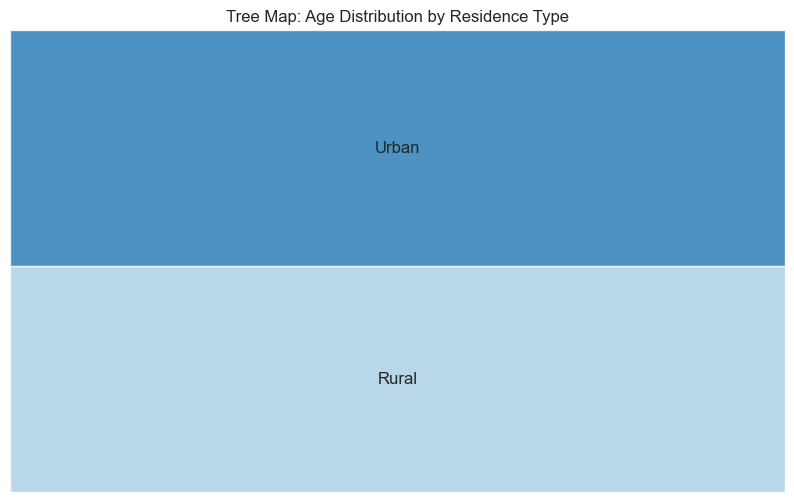

In [8]:
import squarify

# Prepare data for the tree map
residence_age_group = stroke_data.groupby('Residence_type')['age'].sum().reset_index()

# Create a tree map for 'age' by 'Residence_type'
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=residence_age_group['age'], 
    label=residence_age_group['Residence_type'], 
    color=sns.color_palette("Paired"), 
    alpha=0.8
)
plt.axis('off')
plt.title("Tree Map: Age Distribution by Residence Type")
plt.show()  # To display the plot in this environment


/var/folders/00/v47jm2yj45586bq73lrp36nh0000gn/T/ipykernel_75782/3106287357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


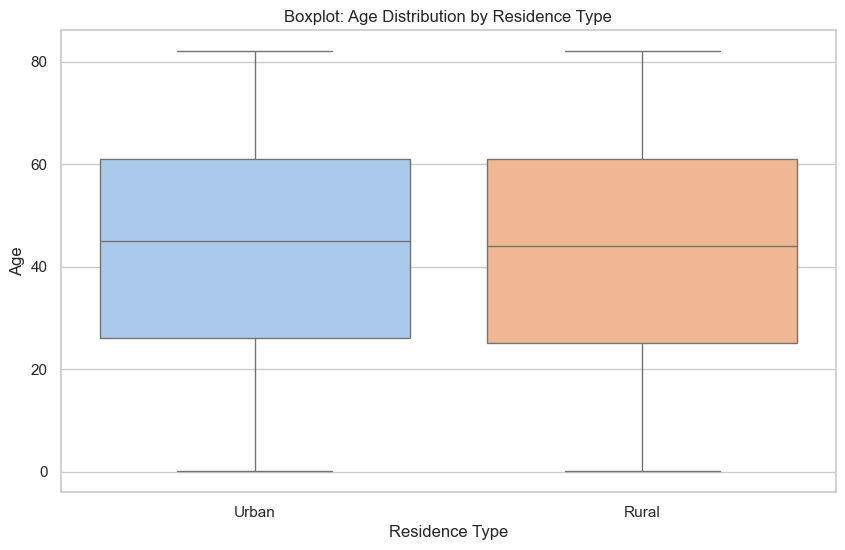

In [9]:
# Alternative approach using a boxplot to show 'age' distribution by 'Residence_type'
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=stroke_data, 
    x='Residence_type', 
    y='age', 
    palette='pastel'
)
plt.title("Boxplot: Age Distribution by Residence Type")
plt.xlabel("Residence Type")
plt.ylabel("Age")
plt.show()  # To display the plot in this environment


In [10]:
import plotly.express as px

# Create an interactive plot showing 'avg_glucose_level' with different factors
fig = px.scatter(
    stroke_data, 
    x='age', 
    y='avg_glucose_level', 
    color='stroke', 
    size='bmi', 
    hover_data=['work_type', 'Residence_type'],
    title='Interactive Scatter Plot: Age vs Avg Glucose Level'
)

# Show the interactive scatter plot with hover data
fig.show()  # To display the plot in this environment


In [13]:
# Data preparation for the donut chart
stroke_by_gender = stroke_data.groupby(['gender', 'stroke']).size().reset_index(name='count')

# Create the donut chart to show stroke proportions by gender
fig_donut = px.pie(
    stroke_by_gender, 
    values='count', 
    names='gender', 
    hole=0.5, 
    title='Donut Chart: Stroke Proportions by Gender'
)

# Show the donut chart
fig_donut.show()  # To display the plot in this environment


/var/folders/00/v47jm2yj45586bq73lrp36nh0000gn/T/ipykernel_75782/2889279367.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




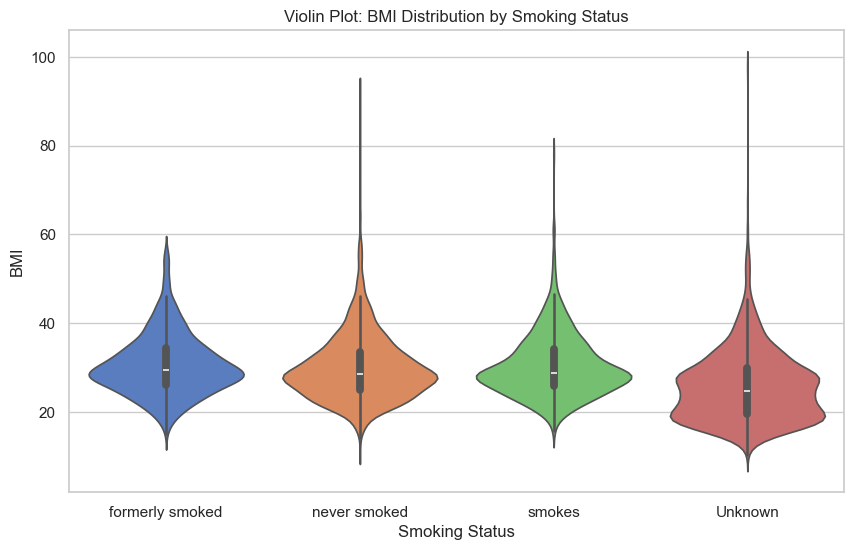

In [14]:
# Create a violin plot to show the distribution of 'bmi' by 'smoking_status'
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=stroke_data, 
    x='smoking_status', 
    y='bmi', 
    palette='muted'
).set_title("Violin Plot: BMI Distribution by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("BMI")
plt.show()  # To display the plot in this environment


<Figure size 1000x1000 with 0 Axes>

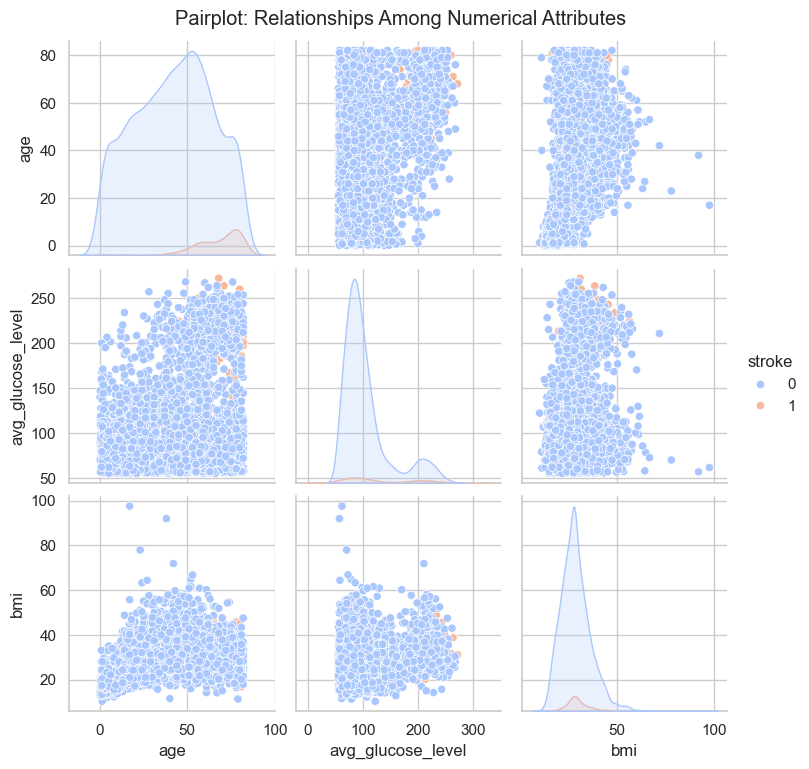

In [15]:
# Create a pairplot to examine relationships among multiple numerical attributes
plt.figure(figsize=(10, 10))
sns.pairplot(
    stroke_data, 
    hue='stroke', 
    vars=['age', 'avg_glucose_level', 'bmi'], 
    palette='coolwarm'
).fig.suptitle('Pairplot: Relationships Among Numerical Attributes', y=1.02)

plt.show()  # To display the plot in this environment


In [8]:
import plotly.express as px
import pandas as pd



fig_sunburst = px.sunburst(
    stroke_data, 
    path=['ever_married', 'work_type', 'stroke'], 
    color='stroke',  # This will color the plot based on stroke occurrence
    title='Sunburst Diagram: Marriage, Work Type, and Stroke'
)
fig_sunburst.show()


In [9]:
fig_scatter = px.scatter(
    stroke_data,
    x='age',
    y='bmi',
    color='stroke',  # Color coding by stroke occurrence
    hover_data=['work_type', 'Residence_type'],  # Additional data to show on hover
    title='Interactive Scatter Plot: Age vs BMI with Stroke Overlay'
)
fig_scatter.show()


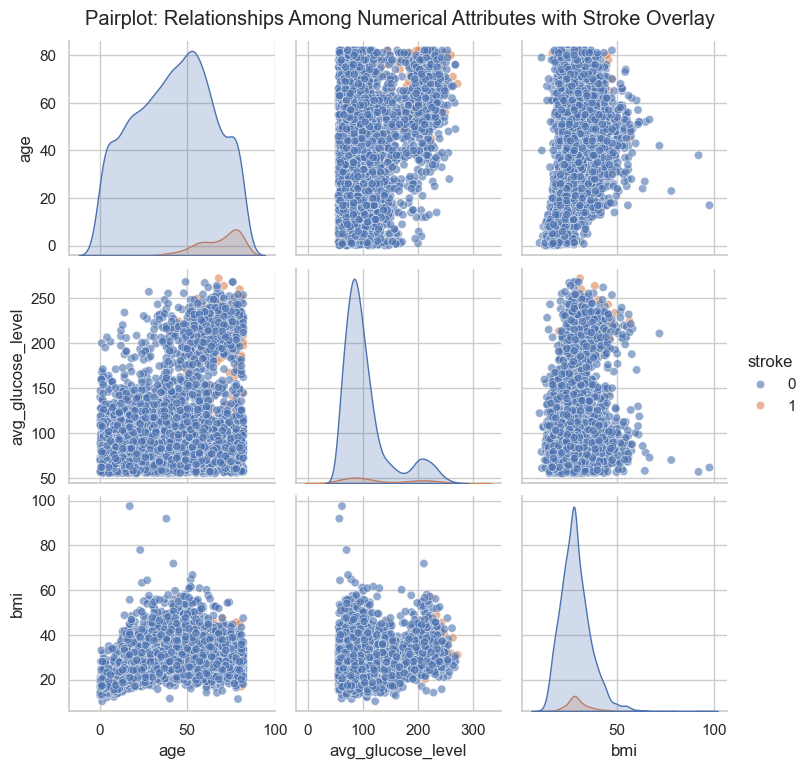

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter columns for the pairplot
columns_to_plot = ['age', 'avg_glucose_level', 'bmi', 'stroke']
pairplot_data = stroke_data[columns_to_plot]

# Create a pairplot
sns.pairplot(pairplot_data, hue='stroke', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: Relationships Among Numerical Attributes with Stroke Overlay', y=1.02)
plt.show()


In [13]:
import plotly.express as px

fig_sunburst = px.sunburst(
    stroke_data, 
    path=['ever_married', 'work_type', 'stroke'], 
    title="Sunburst Diagram: Stroke Distribution by Marital Status and Work Type",
    color='stroke'
)
fig_sunburst.show()


In [14]:
fig_3d = px.scatter_3d(
    stroke_data.dropna(subset=['bmi']), 
    x='age', 
    y='bmi', 
    z='avg_glucose_level', 
    color='stroke',
    title="3D Scatter Plot: Age, BMI, and Glucose Level by Stroke Occurrence"
)
fig_3d.show()


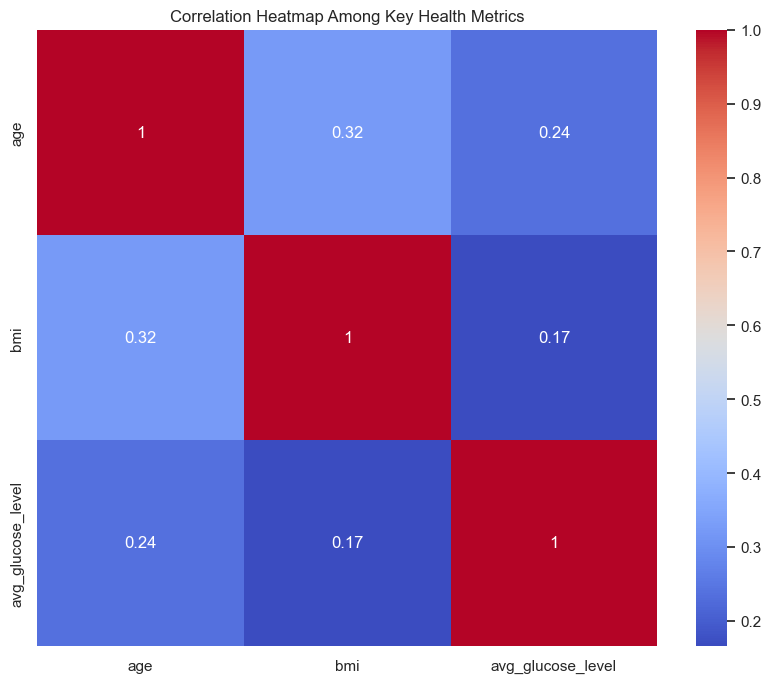

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    stroke_data[['age', 'bmi', 'avg_glucose_level']].dropna().corr(), 
    annot=True, 
    cmap='coolwarm'
)
plt.title("Correlation Heatmap Among Key Health Metrics")
plt.show()



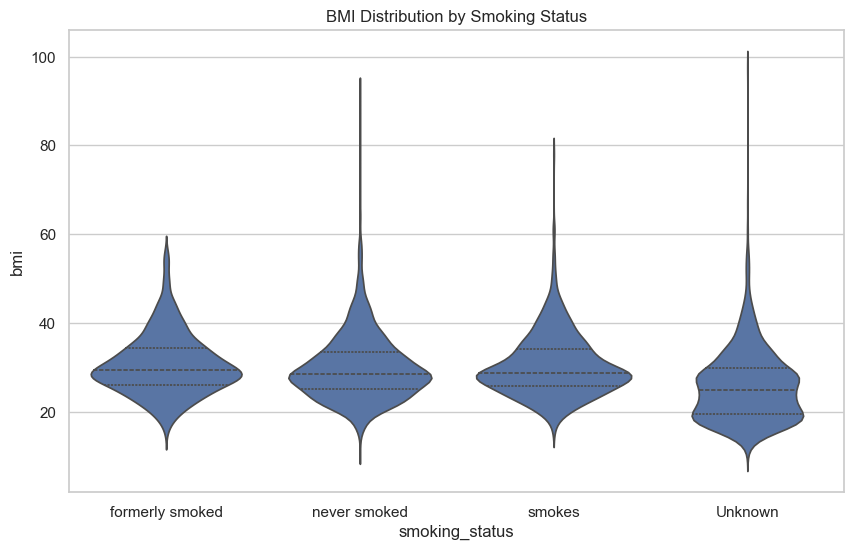

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='smoking_status', 
    y='bmi', 
    data=stroke_data.dropna(subset=['bmi']),
    inner='quartile'
)
plt.title("BMI Distribution by Smoking Status")
plt.show()



In [19]:
fig_parallel = px.parallel_coordinates(
    stroke_data,
    dimensions=['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'],
    color='stroke',
    title="Parallel Coordinates: Risk Factors for Stroke"
)
fig_parallel.show()


In [21]:
fig_area = px.area(
    stroke_data,
    x='age',
    y='stroke',
    color='gender',
    title="Stacked Area Chart: Stroke Incidence by Age and Gender",
    groupnorm='percent'  # Normalize the area chart to show percentage rather than count
)
fig_area.show()


/var/folders/00/v47jm2yj45586bq73lrp36nh0000gn/T/ipykernel_45819/1247485541.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




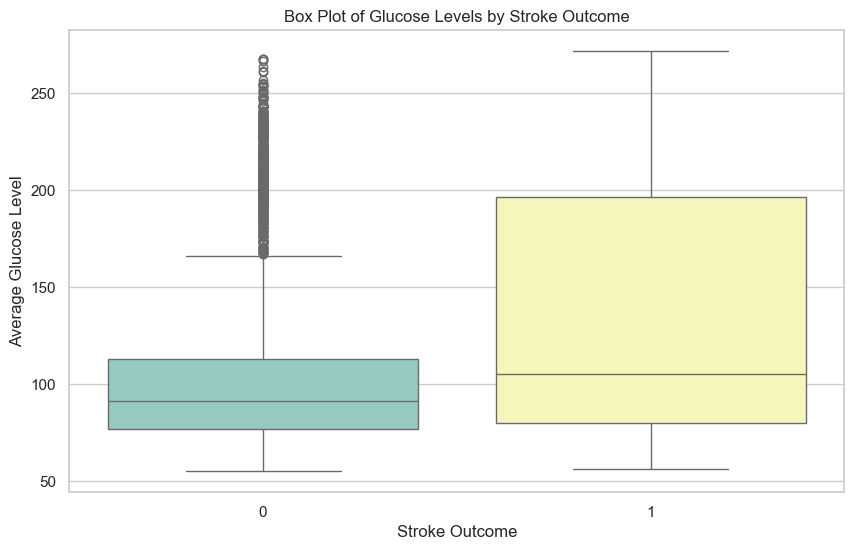

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='stroke',
    y='avg_glucose_level',
    data=stroke_data,
    palette='Set3'
)
plt.title("Box Plot of Glucose Levels by Stroke Outcome")
plt.xlabel('Stroke Outcome')
plt.ylabel('Average Glucose Level')
plt.show()


In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a scatter plot of BMI vs. avg_glucose_level colored by stroke occurrence
scatter_plot = px.scatter(
    stroke_data.dropna(subset=['bmi', 'avg_glucose_level']),  # ensure no NaN values
    x='bmi',
    y='avg_glucose_level',
    color='stroke',
    title="Interactive Scatter Plot: BMI vs. Glucose Level with Stroke Outcome",
    labels={'stroke': 'Stroke Outcome'}
)

# Create a histogram for age
histogram = px.histogram(
    stroke_data,
    x='age',
    title="Histogram of Age",
    labels={'age': 'Age'}
)

# Create a figure with both plots
fig = make_subplots(rows=2, cols=1)
fig.add_trace(
    go.Scatter(
        x=scatter_plot['data'][0]['x'],
        y=scatter_plot['data'][0]['y'],
        mode='markers',
        marker=dict(color=scatter_plot['data'][0]['marker']['color']),
        showlegend=False
    ),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(
        x=histogram['data'][0]['x'],
        marker=dict(color='blue'),
        opacity=0.75,
        showlegend=False
    ),
    row=2, col=1
)

# Update layout
fig.update_layout(height=800, title_text="Linked Views: Scatter Plot and Histogram of Age by Selection")
fig.show()


In [25]:
# First, calculate the mean values for the variables of interest, grouped by stroke outcome
grouped_data = stroke_data.groupby('stroke')[['avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']].mean().reset_index()

# Create a radar chart
fig = go.Figure()

categories = ['Average Glucose Level', 'BMI', 'Hypertension', 'Heart Disease']

for i, stroke in enumerate(grouped_data['stroke']):
    fig.add_trace(go.Scatterpolar(
        r=[grouped_data.loc[i, 'avg_glucose_level'], grouped_data.loc[i, 'bmi'],
           grouped_data.loc[i, 'hypertension'], grouped_data.loc[i, 'heart_disease']],
        theta=categories,
        fill='toself',
        name=f'Stroke: {stroke}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(grouped_data.max())]
        )),
    title="Radar Chart: Health Profiles by Stroke Outcome"
)

fig.show()


In [26]:
import plotly.graph_objects as go

# Create two box plots on the same figure for comparative purposes
fig = go.Figure()

# BMI box plot for stroke patients
fig.add_trace(go.Box(y=stroke_data[stroke_data['stroke'] == 1]['bmi'],
                     name='Stroke: Yes',
                     marker_color='red',
                     boxmean='sd',  # Display the mean and standard deviation
                     ))

# BMI box plot for non-stroke patients
fig.add_trace(go.Box(y=stroke_data[stroke_data['stroke'] == 0]['bmi'],
                     name='Stroke: No',
                     marker_color='blue',
                     boxmean='sd'
                     ))

# Avg. Glucose Level box plot for stroke patients
fig.add_trace(go.Box(y=stroke_data[stroke_data['stroke'] == 1]['avg_glucose_level'],
                     name='Stroke: Yes',
                     marker_color='red',
                     boxmean='sd',
                     xaxis='x2'
                     ))

# Avg. Glucose Level box plot for non-stroke patients
fig.add_trace(go.Box(y=stroke_data[stroke_data['stroke'] == 0]['avg_glucose_level'],
                     name='Stroke: No',
                     marker_color='blue',
                     boxmean='sd',
                     xaxis='x2'
                     ))

# Update layout to have two side by side plots
fig.update_layout(
    title="Multi-variable Box Plot: BMI and Glucose Level by Stroke Outcome",
    xaxis=dict(domain=[0, 0.45], title='BMI'),
    xaxis2=dict(domain=[0.55, 1], title='Avg Glucose Level'),
    yaxis_title='Values',
    boxmode='group'  # Group boxes of the different traces for each variable
)
fig.show()


In [27]:
import plotly.express as px

# Preparing data for the plot
temp_data = stroke_data.groupby(['Residence_type', 'stroke'])['hypertension', 'heart_disease'].mean().reset_index()

# Creating a clustered bar chart
fig = px.bar(temp_data, x='Residence_type', y=['hypertension', 'heart_disease'],
             color='stroke', barmode='group',
             title="Clustered Bar Chart: Hypertension and Heart Disease by Residence Type and Stroke Outcome")

fig.show()


/var/folders/00/v47jm2yj45586bq73lrp36nh0000gn/T/ipykernel_45819/2868041542.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [28]:
import plotly.express as px

fig = px.treemap(stroke_data, path=['stroke', 'smoking_status'],
                 title="Treemap: Smoking Status Segmented by Stroke Outcome",
                 color='stroke',  # Color based on stroke outcome
                 color_continuous_scale='RdBu')

fig.show()


In [29]:
import plotly.express as px

fig = px.scatter(
    stroke_data,
    x='age',
    y='bmi',
    size='avg_glucose_level',  # Bubble size represents average glucose levels
    color='smoking_status',    # Color represents smoking status
    hover_name='smoking_status',  # Hover shows smoking status
    title="Interactive Bubble Chart: Age vs. BMI by Smoking Status",
    size_max=60  # Max size of bubbles
)
fig.update_layout(xaxis_title='Age', yaxis_title='BMI')
fig.show()


In [30]:
import plotly.graph_objects as go

# Create density contour plot for stroke outcome
fig = go.Figure()

# Add traces for stroke and non-stroke patients
fig.add_trace(go.Histogram2dContour(
    x=stroke_data[stroke_data['stroke'] == 1]['avg_glucose_level'],
    y=stroke_data[stroke_data['stroke'] == 1]['bmi'],
    contours=dict(
        coloring ='heatmap',
        showlabels = True
    ),
    name='Stroke'
))
fig.add_trace(go.Histogram2dContour(
    x=stroke_data[stroke_data['stroke'] == 0]['avg_glucose_level'],
    y=stroke_data[stroke_data['stroke'] == 0]['bmi'],
    contours=dict(
        coloring ='heatmap',
        showlabels = True
    ),
    name='No Stroke'
))

fig.update_layout(
    title="Density Contour Plot: Glucose Level vs. BMI by Stroke Outcome",
    xaxis_title='Average Glucose Level',
    yaxis_title='BMI'
)
fig.show()


In [32]:
import plotly.graph_objects as go

# Prepare the data for the radar chart
categories = ['hypertension', 'heart_disease', 'bmi']

# Calculate the average for each category grouped by stroke
avg_data = stroke_data.groupby('stroke')[categories].mean().reset_index()

# Creating the radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=avg_data.loc[avg_data['stroke'] == 0, categories].values.flatten(),
    theta=categories,
    fill='toself',
    name='No Stroke'
))

fig.add_trace(go.Scatterpolar(
    r=avg_data.loc[avg_data['stroke'] == 1, categories].values.flatten(),
    theta=categories,
    fill='toself',
    name='Stroke'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, stroke_data[categories].max().max()]
        )
    ),
    title="Interactive Radar Chart: Comparison of Risk Factors by Stroke Outcome"
)

fig.show()


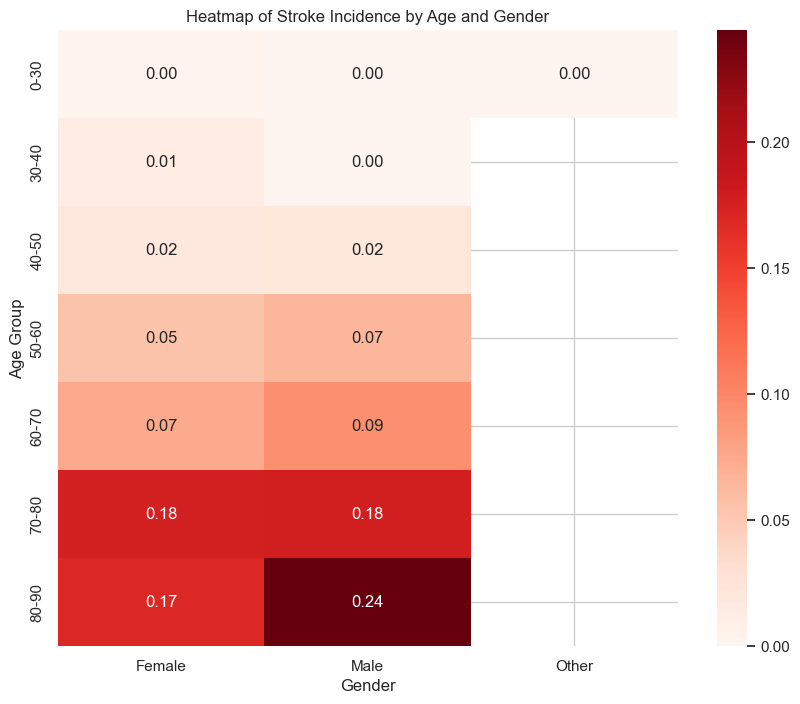

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating age bins for better visualization
stroke_data['age_bin'] = pd.cut(stroke_data['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

# Creating a pivot table to calculate stroke incidence by age bin and gender
pivot_data = stroke_data.pivot_table(values='stroke', index='age_bin', columns='gender', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, cmap='Reds', fmt=".2f")
plt.title('Heatmap of Stroke Incidence by Age and Gender')
plt.ylabel('Age Group')
plt.xlabel('Gender')
plt.show()


In [34]:
import plotly.express as px

# Preparing the data by calculating the proportion of stroke for each group
grouped_data = stroke_data.groupby(['Residence_type', 'ever_married'])['stroke'].mean().reset_index()

# Plotting the stacked bar chart
fig = px.bar(
    grouped_data,
    x='Residence_type',
    y='stroke',
    color='ever_married',
    text='stroke',
    title="Stacked Bar Chart of Stroke Incidence by Residence Type and Marital Status",
    labels={'stroke': 'Stroke Incidence'}
)
fig.update_layout(yaxis_tickformat = '%')
fig.show()


In [38]:
import plotly.graph_objects as go

# Calculate descriptive statistics for BMI and Glucose Level grouped by age categories
age_groups = pd.cut(stroke_data['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
desc_stats = stroke_data.groupby(age_groups)['bmi', 'avg_glucose_level'].describe()

# Prepare the data for the candlestick chart
open_bmi = desc_stats['bmi']['25%']
high_bmi = desc_stats['bmi']['max']
low_bmi = desc_stats['bmi']['min']
close_bmi = desc_stats['bmi']['75%']

open_glucose = desc_stats['avg_glucose_level']['25%']
high_glucose = desc_stats['avg_glucose_level']['max']
low_glucose = desc_stats['avg_glucose_level']['min']
close_glucose = desc_stats['avg_glucose_level']['75%']

# Creating candlestick chart for BMI
fig = go.Figure(data=[go.Candlestick(x=desc_stats.index,
                                     open=open_bmi, high=high_bmi,
                                     low=low_bmi, close=close_bmi,
                                     name='BMI'),
                      go.Candlestick(x=desc_stats.index,
                                     open=open_glucose, high=high_glucose,
                                     low=low_glucose, close=close_glucose,
                                     name='Avg Glucose Level',
                                     increasing_line_color='cyan', decreasing_line_color='gray')])

fig.update_layout(title='Candlestick Chart: BMI and Glucose Level by Age Group',
                  xaxis_title='Age Group',
                  yaxis_title='Values',
                  xaxis_rangeslider_visible=False)
fig.show()



/var/folders/00/v47jm2yj45586bq73lrp36nh0000gn/T/ipykernel_45819/1676123547.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [36]:
import plotly.express as px

# Calculating mean values of risk factors for stroke and no stroke groups
risk_factors = stroke_data.groupby('stroke')['hypertension', 'heart_disease'].mean().reset_index()

fig = px.line_polar(risk_factors, r='hypertension', theta='stroke', line_close=True,
                    color='stroke', template='plotly_dark',
                    title='Polar Area Chart: Hypertension and Heart Disease by Stroke Outcome')
fig.add_trace(px.line_polar(risk_factors, r='heart_disease', theta='stroke', line_close=True,
                            color='stroke', template='plotly_dark').data[0])
fig.update_traces(fill='toself')
fig.show()


/var/folders/00/v47jm2yj45586bq73lrp36nh0000gn/T/ipykernel_45819/2226108374.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

